In [1]:
import mlx.core as mx
import mlx.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

In [2]:
X, y = datasets.make_regression(
    n_samples=2000,
    n_features=1,
    n_targets=1,
    noise=19.0,
    random_state=42,
)
X.shape, y.shape

((2000, 1), (2000,))

In [3]:
X[0], X[0].shape

(array([-0.32163505]), (1,))

In [21]:
W = mx.random.normal(shape=(X.shape[-1],))
X, y = mx.array(X), mx.array(y)
b = mx.random.normal(shape=(X.shape[0],))

In [22]:
def predict(X, W, b):
    return X @ W + b

def loss_fn(W, X, b, y_true):
    # return 0.5 * mx.mean(mx.square(predict(X, W, b) - y_true))
    return nn.losses.mse_loss(predictions=predict(X, W, b), targets=y_true)

# compute gradient with respect to the first argument (0) of loss_fn -> W
grad_fn = mx.value_and_grad(loss_fn, 0) 

In [23]:
for i in range(100):
    loss, grad = grad_fn(W, X, b, y)
    W = W - 0.1 * grad
    mx.eval(W)
    if i % 10 == 0:
        print(f"Iter: {i} | Loss: {loss.item():.5f}")

Iter: 0 | Loss: 1965.25012
Iter: 10 | Loss: 369.07410
Iter: 20 | Loss: 348.59988
Iter: 30 | Loss: 348.33728
Iter: 40 | Loss: 348.33389
Iter: 50 | Loss: 348.33386
Iter: 60 | Loss: 348.33386
Iter: 70 | Loss: 348.33383
Iter: 80 | Loss: 348.33383
Iter: 90 | Loss: 348.33383


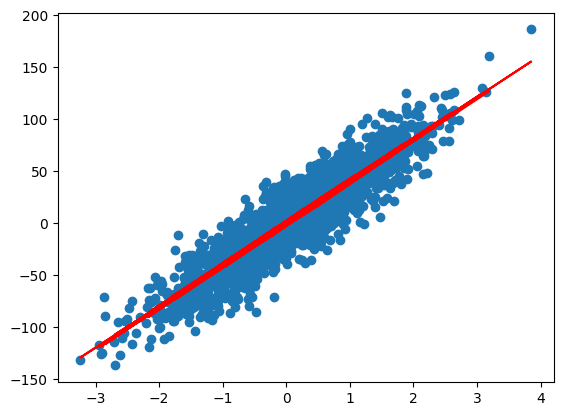

In [24]:
X_np = np.array(X, copy=False)
y_np = np.array(y, copy=False)
y_pred_np = np.array(predict(X, W, b))

plt.scatter(X_np, y_np)
plt.plot(X_np, y_pred_np, c="r")